# KNN
---
**算法名称： KNN** - K nearest neighbors for classifier and regressor

**1. 类别**
    
    KNN 属于监督学习算法的一种，即可用于分类 Classifier 也可以用于回归 Regressor。 
    分类时：使用多数表决法进行预测； 回归时：使用平均值进行预测

**2. 数学原理**

    该算法需要计算训练数据集中所有数据点的空间距离然后生成数据点分布关系图，根据数据点的空间距离分布，通过计算相关数据空间距离的远近进行分类和预测。同时，可以通过调用已训练模型中的KNeighborsClassifier.kneighbors_graph()和KNeighborsClassifier.kneighbors()方法去查看详细数据点分布。该算法通过参数metric设置使用不同的空间距离公式，通常使用欧式距离计算。
     

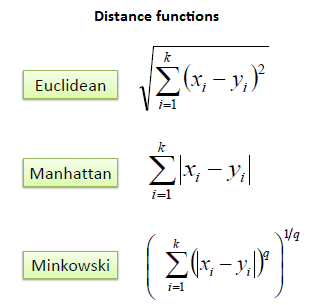    


**3. 算法实现 scikit-learn**

```
KNeighborsClassifier(algorithm='auto',        
                     leaf_size=30, 
                     metric='minkowski', 
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=3, 
                     p=2,
                     weights='uniform')
                     
algorithm: 计算查找最邻近邻居的算法 {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’} 
    1. brute 既然要找到k个最近的邻居来做预测，那么只需要计算预测样本和所有训练集中的样本的距离，然后计算出最小的k个距离即可，接着多数表决，很容易做出预测。这个方法的确简单直接，在样本量少，样本特征少的时候有效。比较适合于少量样本的简单模型的时候用。
    2. kd_tree kd(k-dimension tree)树算法没有一开始就计算测试样本和所有训练样本的距离，而是先用kd树存储训练数据集，建好了kd树模型后再对测试集做预测，可以减少计算距离的次数。所谓的kd树就是k个特征维度的树，注意这里的k和kNN中的k的意思不同。kNN中的k代表k个邻近样本，kd树中的k代表样本特征的维数。KD树建树采用的是从m个样本的n维特征中，分别计算n个特征的取值的方差（数据方差大表明沿该坐标轴方向的数据分散的比较开，在这个方向上进行数据分割有较好的分辨率），用方差最大的k维特征nk来作为根节点。选择特征nk取值的中位数nkv对应的样本作为划分点，对于所有的第k维特征的取值小于nkv的样本，划入左子树；对于第k维特征的取值大于或等于nkv的样本，划为右子树，采用和刚才同样的办法找方差最大的特征来做子节点，递归的生成KD树。
    关于kd树更多知识见 http://blog.csdn.net/likika2012/article/details/39619687
    3. ball_tree 先构造一个超球体，此超球体是可以包含所有样本的最小球体；从球中选择一个离球的中心点最远的点，然后选择第二个点离第一个点最远，将球中所有的点分配到离这两个聚类中心最近的一个上，然后计算每个聚类的中心，以及聚类能够包含它所有数据点所需的最小半径。这样得到了两个子超球体，和KD树里面的左右字数对应。对于这两个超球体，递归执行上一步骤，最终得到一个球树。
           
leaf_size: 使用ball_tree/kd_tree时的参数，影响建立树的建立及查询速度和使用的内存。

metric:    模型的距离矩阵。

metric_params:

n_jobs=1:  查找邻居时使用的平行作业数量

n_neighbors: 参考邻近邻居的数量

p: 计算距离时,使用的指数。

weights: 缺省是uniform权重，即所有的权重都一样，邻近的邻居节点在投票是一样重要。在某些情况下，最好对邻点加权重，使较近的点在投票中更加重要。这时可以通过设置 weight =’distance’，分配与查询点距离的倒数成反比的权重。或者，可以自定义权重。

----------------------
Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
```

另外，scikit-learn中还有RadiusNeighborsClassifier，其基于每个点在固定半径r内的样本数量学习，其中r是用户指定的浮点值。 

```
RadiusNeighborsClassifier(radius=1.0, 
                          weights=’uniform’, 
                          algorithm=’auto’, 
                          leaf_size=30, 
                          p=2, 
                          metric=’minkowski’, 
                          outlier_label=None, 
                          metric_params=None, 
                          n_jobs=None, 
                          **kwargs)

```


**4. 算法关键参数及特点**
- **n_neighbor** [1..n]

当n_neighbor过大时，由于使用了过多的邻居节点做参考，模型欠拟合；当n_neighbor过小时，由于使用了过少的邻居节点做参考，模型过度拟合

> model underfitting <- use more neighbors <- increase n_neighbor, the max = n 

> model overfitting  <- use less neighbors <- decrease n_neighbor, the min = 1 

**5. 总结**

- KNN算法是最简单有效的分类算法，简单且容易实现。当训练数据集很大时，需要大量的存储空间，而且需要计算待测样本和训练数据集中所有样本的距离，所以非常耗时。另外，kNN算法不能给出数据间的结构信息，所以无法提取样本的特征。
- KNN对于随机分布的数据集分类效果较差，对于类内间距小，类间间距大的数据集分类效果好，而且对于边界不规则的数据效果好于线性分类器。
- KNN对于样本不均衡的数据效果不好，需要进行改进。改进的方法时对k个近邻数据赋予权重，比如距离测试样本越近，权重越大。
- KNN很耗时，除了蛮力实现的方法，当数据量大时，可以将数据以树的形式呈现，能提高速度，常用的有kd-tree和ball-tree。

- KNN的主要优点：
```
思想简单，既可以做分类又可以做回归；
可用于非线性分类；
训练时间复杂度比支持向量机之类的算法低，仅为O(n)；
和朴素贝叶斯之类的算法比，对数据没有假设，准确度高，对异常点不敏感；
对类域的交叉或重叠较多的待分样本集来说，KNN方法较其他方法更为适合；
比较适用于样本比较大的类域的自动分类，而那些样本容量比较小的类域采用这种算法容易产生误分。
```
- KNN主要缺点：
```
计算量大，尤其是特征数非常多的时候；
样本不平衡时，对稀有类别的预测准确率低；
KD树，球树之类的模型建立需要大量的内存；
使用懒惰的学习方法，基本不学习，导致预测时的速度比逻辑回归之类的算法慢；
比起决策树模型，KNN模型的可解释性不强。
```

# KNN Classifier
---

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import mglearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# --------------------------------------------------
# use make_forge to generate data set and show them 
# --------------------------------------------------
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("Generated dataset by make_forge -> X.shape: {}".format(X.shape))
print(X)
print("Generated dataset by make_forge -> y.shape: {}".format(y.shape))
print(y)
plt.title("The Whole Data Set")
plt.show()

# --------------------------------------------------
# use train_test_split of sklearn to split data set into train set and test set
# --------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# --------------------------------------------------
# show the distribution of train/test data set
# --------------------------------------------------
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers=['^'])
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers=['*'])
plt.title("The Whole Data Set: Train-'^', Test-'*' ")
plt.show()

# --------------------------------------------------
#show test data set
#mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
#plt.title("Test Data Set")
#plt.show()
# --------------------------------------------------

# --------------------------------------------------
# import knn classifier and set it with n_neighbors=3
# --------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

# --------------------------------------------------
# train model 
# --------------------------------------------------
clf.fit(X_train, y_train)

# --------------------------------------------------
# print the details of the model 
# --------------------------------------------------
print("----------------Model Details-------------------------\n")
print("Trained Model: {}\n".format(clf))
print("Train Data Shape:\n{}".format(X_train.shape))
print("Train Data Set:\n{}".format(X_train))
print("Model Kneighbors Graph:\n {}".format(clf.kneighbors_graph()))
print("Model Kneighbors:\n {}".format(clf.kneighbors()))
print("\n")

# --------------------------------------------------
# print prediction result on test data set 
# --------------------------------------------------
print("K=3, Test Set Prediction Result: {}".format(clf.predict(X_test)))

# --------------------------------------------------
# print prediction accuracy on test data set
# --------------------------------------------------
print("K=3, Test Set Accuracy: {}".format(clf.score(X_test, y_test)))
print("\n")

# --------------------------------------------------
# Try to train the model with different number of neighbors
# --------------------------------------------------
clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(X_train, y_train)
print("K=6, Test Set Prediction Result: {}".format(clf.predict(X_test)))
print("K=6, Test Set Accuracy: {}".format(clf.score(X_test, y_test)))
print("\n")

clf = KNeighborsClassifier(n_neighbors = 9)
clf.fit(X_train, y_train)
print("K=9, Test Set Prediction Result: {}".format(clf.predict(X_test)))
print("K=9, Test Set Accuracy: {}".format(clf.score(X_test, y_test)))
print("\n")

clf = KNeighborsClassifier(n_neighbors = 18)
clf.fit(X_train, y_train)
print("K=18, Test Set Prediction Result: {}".format(clf.predict(X_test)))
print("K=18, Test Set Accuracy: {}".format(clf.score(X_test, y_test)))
print("\n")

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.16.2
scipy version: 1.2.1
IPython version: 7.4.0
sklearn version: 0.20.3
Generated dataset by make_forge -> X.shape: (26, 2)
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
Generated d

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

----------------Model Details-------------------------

Trained Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Train Data Shape:
(19, 2)
Train Data Set:
[[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [11.563957    1.3389402 ]
 [ 9.15072323  5.49832246]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.1062269   4.28695977]
 [ 8.67494727  4.47573059]
 [ 9.67284681 -0.20283165]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 9.96346605  4.59676542]
 [ 9.50048972 -0.26430318]
 [ 9.25694192  5.13284858]
 [ 8.68937095  1.48709629]]
Model Kneighbors Graph:
   (0, 16)	1.0
  (0, 12)	1.0
  (0, 18)	1.0
  (1, 13)	1.0
  (1, 14)	1.0
  (1, 18)	1.0
  (2, 17)	1.0
  (2, 5)	1.0
  (2, 7)	1.0
  (3, 8)	1.0
  (3, 10)	1.0
  (3, 11)	1.0
  (4, 12)	1.0
 

### Show example graph with different n_neighbors[1, 3, 9]

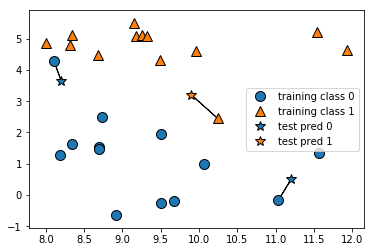

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

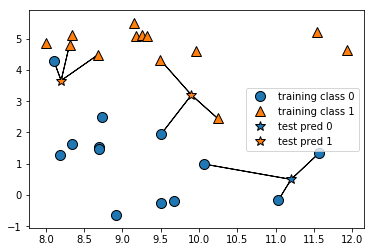

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

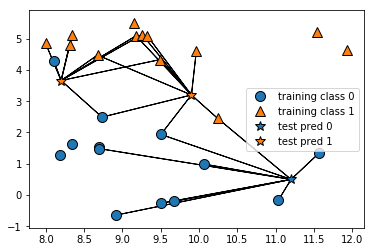

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=9)
plt.show()

### Decesion Boundary: show decision boundaries for KNN with forge data set
Within this example, by increasing the number of neighbors, we find that the curve of boundary is more smooth. It also means that we are less care for these exceptional points.  

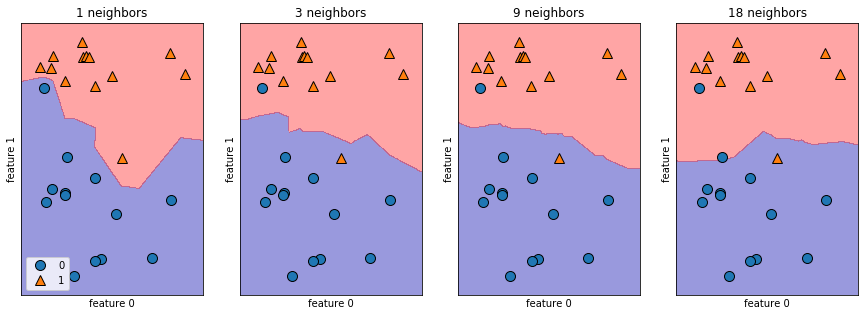

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))

for n_neighbors, ax in zip([1,3,9,18], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

### Generalization: Use KNN on the "Breast Cancer" data set. 
With this example, we can identify the rule for accuracy and the number of neighbors. With the increasment of neighbors, the accuracy of training set is down and the accuracy of test set is up. The model is going to be more general.
> n_neighbor [1..n]

>> underfitting < use more neighbors < increase n_neighbor, the max = n 

>> overfitting  < use less neighbors < decrease n_neighbor, the min = 1 

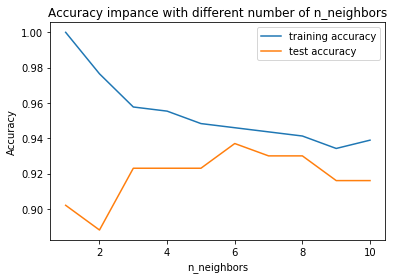

In [6]:
# load dataset 

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# try to use n_neighbors from 1 to 10 

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build the model with knn
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    #record the accuracy of this n_neighbors on train data set 
    training_accuracy.append(clf.score(X_train, y_train))
    
    #record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title("Accuracy impance with different number of n_neighbors")
plt.show()    

---

#  KNN Regressor
---

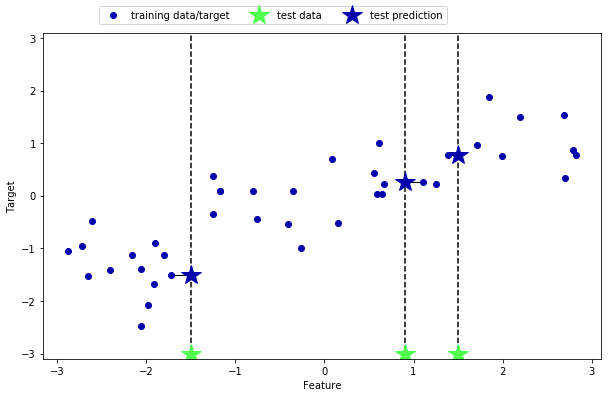

In [7]:
# --------------------------------------------------
# show knn regression example with n_neighbors = 1
# --------------------------------------------------
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

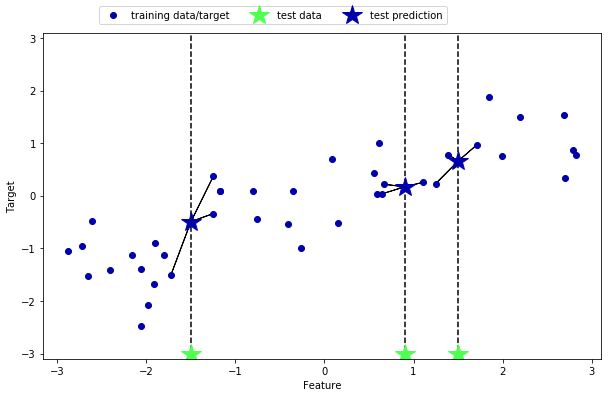

In [8]:
# --------------------------------------------------
# show knn regression example with n_neighbors = 3
# --------------------------------------------------
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

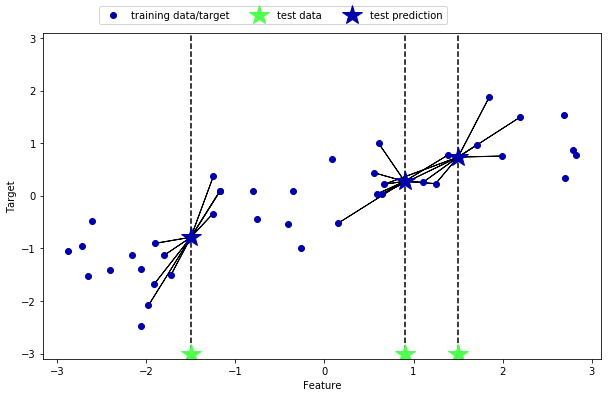

In [9]:
# --------------------------------------------------
# show knn regression example with n_neighbors = 9
# --------------------------------------------------
mglearn.plots.plot_knn_regression(n_neighbors=9)
plt.show()

### Use KNN Regressor on the "Wave" data set to show regression. 
---

In [10]:
# --------------------------------------------------
# import KNeighborsRegressor
# --------------------------------------------------
from sklearn.neighbors import KNeighborsRegressor

# --------------------------------------------------
# generate,split data set into train and test
# --------------------------------------------------
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# --------------------------------------------------
# instantiate the model and set the number of neighbors to consider to 3 
# --------------------------------------------------
reg = KNeighborsRegressor(n_neighbors = 3)

# --------------------------------------------------
# fit the model with train set 
# --------------------------------------------------
reg.fit(X_train, y_train)

# --------------------------------------------------
# show model details 
# --------------------------------------------------
print("The deatils of KNeighborsRegressor:\n {}\n".format(reg))
print("Test set:\n{}".format(X_test))
print("Test set predictions:\n{}".format(reg.predict(X_test)))

print("Test set accuracy with R^2: {:.2f}".format(reg.score(X_test, y_test)))


The deatils of KNeighborsRegressor:
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

Test set:
[[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]
Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set accuracy with R^2: 0.83


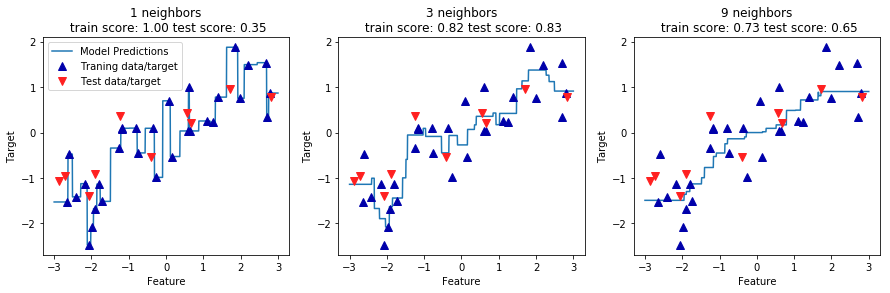

In [11]:
# --------------------------------------------------
# show regressor with different number of neighbors
# --------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# --------------------------------------------------
# create 1000 data points, evenly spaced between -3 and 3
# --------------------------------------------------
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    #make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbors\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions", "Traning data/target", "Test data/target"], loc="best")
plt.show()